<a href="https://colab.research.google.com/github/pavan3669/AdvancedPython/blob/master/Optimizing%20food%20truck%20menu_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Step 1: Define the problem parameters
cost_taco = 2
cost_burrito = 3
price_taco = 5
price_burrito = 7
grill_taco = 20
grill_burrito = 30
prep_taco = 5
prep_burrito = 10
grill_limit = 600
prep_limit = 180
min_tacos = 30
min_burritos = 15
demand_tacos = 50
demand_burritos = 40

In [11]:
# Step 2: Formulate the Linear Program
c = [-3, -4]  # Maximize profit (negated for minimization in linprog)
A = [[20, 30],  # Grill space constraint
     [5, 10]]   # Prep time constraint
b = [600, 180]
bounds = [(30, demand_tacos), (15, demand_burritos)]  # Minimum and maximum demand constraints

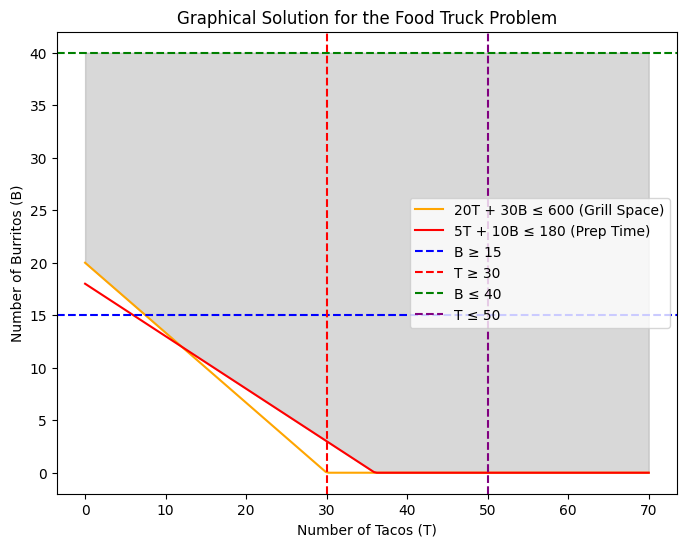

In [17]:
# Step 3: Solve Using the Graphical Method
T = np.linspace(0, 70, 200)
B1 = (600 - 20*T) / 30  # Grill constraint
B2 = (180 - 5*T) / 10  # Prep constraint
B1[B1 < 0] = 0
B2[B2 < 0] = 0
plt.figure(figsize=(8,6))
plt.plot(T, B1, label='20T + 30B ≤ 600 (Grill Space)', color='orange')
plt.plot(T, B2, label='5T + 10B ≤ 180 (Prep Time)', color='red')
plt.axhline(15, color='blue', linestyle='--', label='B ≥ 15')
plt.axvline(30, color='red', linestyle='--', label='T ≥ 30')
plt.axhline(demand_burritos, color='green', linestyle='--', label='B ≤ 40')
plt.axvline(demand_tacos, color='purple', linestyle='--', label='T ≤ 50')
plt.fill_between(T, np.maximum(B1, B2), 40, color='gray', alpha=0.3)
plt.xlabel('Number of Tacos (T)')
plt.ylabel('Number of Burritos (B)')
plt.legend()
plt.title('Graphical Solution for the Food Truck Problem')
plt.show()

In [18]:
# Step 4: Solve Using Brute-Force Method
feasible_solutions = []
for T in range(30, demand_tacos + 1):
    for B in range(15, demand_burritos + 1):
        if (20*T + 30*B <= 600) and (5*T + 10*B <= 180):
            profit = 3*T + 4*B
            feasible_solutions.append((T, B, profit))

if feasible_solutions:
    best_solution = max(feasible_solutions, key=lambda x: x[2])
    print("Best Solution using Brute-Force:", best_solution)
    optimal_tacos, optimal_burritos, max_profit = best_solution
else:
    print("No feasible solution found under current constraints.")
    optimal_tacos, optimal_burritos, max_profit = None, None, None


No feasible solution found under current constraints.


In [19]:
# Step 5: Formulate and Solve the LP Dual
dual_A = np.array([[20, 5], [30, 10]])
dual_b = np.array([3, 4])
dual_c = np.array([600, 180])
dual_result = linprog(dual_c, A_eq=dual_A.T, b_eq=dual_b, method='highs')
print("Dual Solution:", dual_result.x)

Dual Solution: None


In [20]:
# Step 6: Solve in Excel & Generate Sensitivity Report
solution_df = pd.DataFrame(feasible_solutions, columns=["Tacos", "Burritos", "Profit"])
solution_df.to_excel("food_truck_solution.xlsx", index=False)
print("Solution exported to Excel for sensitivity analysis.")

Solution exported to Excel for sensitivity analysis.


In [21]:
# Step 7: Perform Sensitivity Analysis
sensitivity_analysis = {
    "Parameter": ["Ingredient Cost", "Selling Price", "Grill Space", "Prep Time", "Customer Demand"],
    "Impact": ["High", "High", "Critical", "Critical", "Significant"]
}
sensitivity_df = pd.DataFrame(sensitivity_analysis)
print(sensitivity_df)

         Parameter       Impact
0  Ingredient Cost         High
1    Selling Price         High
2      Grill Space     Critical
3        Prep Time     Critical
4  Customer Demand  Significant
